In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
from langgraph.checkpoint.memory import InMemorySaver
load_dotenv()

True

In [2]:
groq_key= os.getenv("GROQ_API_KEY")
llm = ChatGroq(groq_api_key=groq_key,model="llama-3.3-70b-versatile")

In [ ]:
# Checking llm
llm.invoke("who is president of India")

AIMessage(content='The current President of India is Droupadi Murmu. She was elected as the 15th President of India on July 21, 2022, and took office on July 25, 2022. Prior to her presidency, she served as the Governor of Jharkhand from 2015 to 2021.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 40, 'total_tokens': 109, 'completion_time': 0.166665855, 'completion_tokens_details': None, 'prompt_time': 0.001726986, 'prompt_tokens_details': None, 'queue_time': 0.057415814, 'total_time': 0.168392841}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--56087666-3386-41f8-a50d-e47029391b73-0', usage_metadata={'input_tokens': 40, 'output_tokens': 69, 'total_tokens': 109})

In [4]:
## state defining

class JokeState(TypedDict):

    topic: str
    joke: str
    explanation : str
    

In [6]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {"joke": response}

In [7]:
def generate_explantion(state: JokeState):

    prompt = f'write an explantion for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {"explanation" : response}

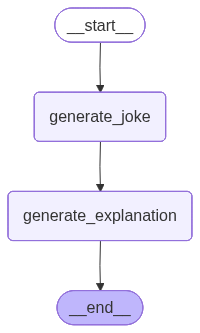

In [11]:
## create Graph

graph= StateGraph(JokeState)

graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explantion)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer = checkpointer)

workflow

In [12]:
config1 = {"configurable": {"thread_id" : "1"}}

workflow.invoke({"topic": "bhel"}, config= config1)

{'topic': 'bhel',
 'joke': 'Why did the bhel go to therapy?\n\nBecause it was feeling a little "mixed up"! (get it? like the mix of ingredients in bhel puri?)',
 'explanation': 'The joke relies on a play on words to create humor. "Bhel" is a shortened term for "bhel puri," a popular Indian street food that consists of a mixture of various ingredients such as puffed rice, savory snacks, onions, tomatoes, and chutneys.\n\nThe joke starts by setting up a unexpected scenario: a plate of bhel puri going to therapy. This already creates a sense of curiosity and surprise, as food items are not typically associated with seeking psychological help.\n\nThe punchline "it was feeling a little \'mixed up\'" is where the wordplay comes in. The phrase "mixed up" has a double meaning here:\n\n1. **Emotional state**: In a therapeutic context, "feeling mixed up" means being emotionally confused, uncertain, or struggling with one\'s thoughts and feelings.\n2. **Food composition**: Bhel puri is a dish tha